## Python statistics essential training - 03_04_twovariables

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
# get data from gapminder
gapminder = pd.read_csv('gapminder.csv')
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [5]:
#look at data
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


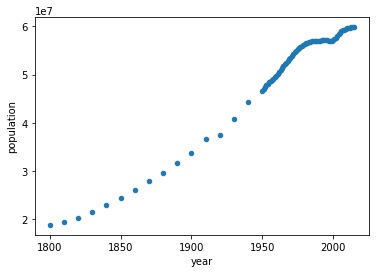

In [7]:
# choose country of interest to downselect by
italy = gapminder.query('country == "Italy"')
# plot two variables against one another.
#slope is similar here throughout data but pts are closer together after 1950
italy.plot.scatter("year", "population")

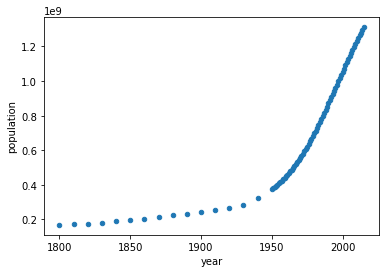

In [8]:
# look at difference of data for another country, slope changes dramatically after 1950
gapminder.query('country == "India"').plot.scatter("year","population")

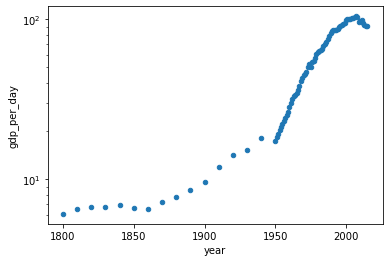

In [9]:
# log of income, last 20 years = :(
italy.plot.scatter("year", "gdp_per_day", logy=True)

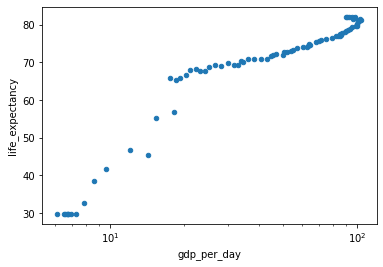

In [10]:
# income has decreased recently, but life expectancy is still going up
italy.plot.scatter("gdp_per_day","life_expectancy", logx=True)

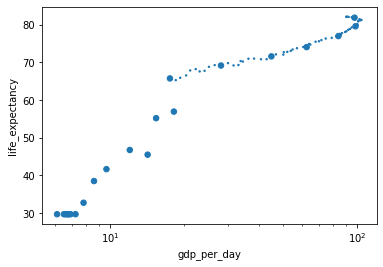

In [11]:
# indicate each decade with larger dot, small dot otherwise
size = np.where(italy.year % 10 == 0,30,2)
italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size)

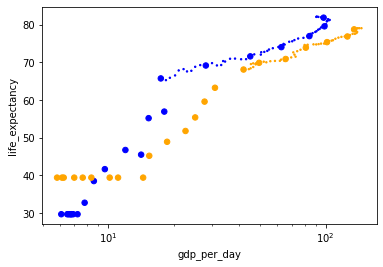

In [12]:
# do the us too, downselect by italy and us
data = gapminder.query('(country == "Italy") or (country == "United States")')
# indicate decades by point size and country by color
size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'Italy','blue','orange')
# progress of the countries is similar with us consistently richer and less healthy
data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

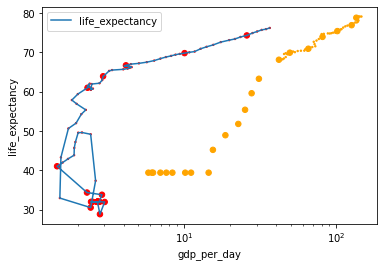

In [14]:
#same as above downselected for china and us
data = gapminder.query('(country == "China") or (country == "United States")')
# indicate decades by point size and country by color
size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'China','red','orange')
# put 2 plots together by saving object from scatter and passing it to line 
ax = data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)
#connect the scatter plot to better understand the points
data[data.country == 'China'].plot.line(x='gdp_per_day',y='life_expectancy',ax=ax)
#a famine resulted in high deaths which is reflected in cluster of points for china